
# Problem statement : 
    
The used car market has been in the auto market for years, but due to risky and unorganized nature of buying used cars without any warranty, and due to lack of certification of used cars, the pre-owned car business has been unable to become a significant part of the auto industry. From
the last four years, with major car manufacturers entering intothe pre-owned car business in a big way. 
The competition between pre-owned cars and new cars has reached its peak. 
All these pre-owned cars are generally termed as “Certified Used Cars”, as they are provided warranty and certified quality from the car dealers. 
Different car manufacturers have entered the pre-owned car business with different objectives, and they have different marketing strategies and priorities in entering into the pre-owned car business.
Review of Literature
A used car can be much cheaper than its new counterpart.
The depreciation is lesser and car financing too can be obtained easily. A survey was conducted and it was revealed that
the demand for the used car market in India per year is 1.4 million cars (Carazoo 2012).

# Business goal: 
 To build a Machine learning model for predicting the price of used cars 

In [1]:
import pandas as pd 
import numpy as np 
import pandas_profiling as pp
import sweetviz as sv
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib notebook 

In [2]:
data = pd.read_excel("Data3.xlsx")
data.head()

,Unnamed: 0,Index,Car Name,Kms driven,First registration,Transmission,Fuel_type,Vendor,Location,Price in Euro,With or without Tax,Drive type,features_score,Power in kW
0,0,0,BMW 520 d 140 kW,32125,3,Automatic,Diesel,Dealership,Germany,32899.0,without 21% VAT,2x4,2,140
1,1,1,Kia Sorento 2.2 CRDi AWD 147 kW,63400,4,Automatic,Diesel,Dealership,Germany,34649.0,without 21% VAT,4x4,2,147
2,2,2,Opel Grandland X 147 kW,2700,2,Automatic,Hybrid,Dealership,Italy,35349.0,without 21% VAT,4x4,2,147
3,3,3,BMW 320 d 140 kW,26145,1,Automatic,Diesel,Dealership,Germany,39349.0,without 21% VAT,2x4,2,140
4,4,4,BMW 320 d Sport Line 140 kW,28199,1,Automatic,Diesel,Dealership,Germany,40099.0,without 21% VAT,2x4,2,140


In [3]:
labels =["X","X1","Car_name","Kms_driven","Age","Transmisson","Fuel_type","Vendor","Location","Price_Euro","Tax","Drive_type","Feature_score","Power_kW"]

In [4]:
# Renaming the labels of the dataframe
data = pd.read_excel("Data3.xlsx", names= labels)
data.head(5)

,X,X1,Car_name,Kms_driven,Age,Transmisson,Fuel_type,Vendor,Location,Price_Euro,Tax,Drive_type,Feature_score,Power_kW
0,0,0,BMW 520 d 140 kW,32125,3,Automatic,Diesel,Dealership,Germany,32899.0,without 21% VAT,2x4,2,140
1,1,1,Kia Sorento 2.2 CRDi AWD 147 kW,63400,4,Automatic,Diesel,Dealership,Germany,34649.0,without 21% VAT,4x4,2,147
2,2,2,Opel Grandland X 147 kW,2700,2,Automatic,Hybrid,Dealership,Italy,35349.0,without 21% VAT,4x4,2,147
3,3,3,BMW 320 d 140 kW,26145,1,Automatic,Diesel,Dealership,Germany,39349.0,without 21% VAT,2x4,2,140
4,4,4,BMW 320 d Sport Line 140 kW,28199,1,Automatic,Diesel,Dealership,Germany,40099.0,without 21% VAT,2x4,2,140


In [5]:
#Dropping the unnecessary columns 
data1= data.drop(["X","X1"], axis = 1)
data1.head(2)

,Car_name,Kms_driven,Age,Transmisson,Fuel_type,Vendor,Location,Price_Euro,Tax,Drive_type,Feature_score,Power_kW
0,BMW 520 d 140 kW,32125,3,Automatic,Diesel,Dealership,Germany,32899.0,without 21% VAT,2x4,2,140
1,Kia Sorento 2.2 CRDi AWD 147 kW,63400,4,Automatic,Diesel,Dealership,Germany,34649.0,without 21% VAT,4x4,2,147


In [6]:
data1.shape

(9978, 12)

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9978 entries, 0 to 9977
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_name       9978 non-null   object 
 1   Kms_driven     9978 non-null   int64  
 2   Age            9978 non-null   int64  
 3   Transmisson    9978 non-null   object 
 4   Fuel_type      9940 non-null   object 
 5   Vendor         9978 non-null   object 
 6   Location       9978 non-null   object 
 7   Price_Euro     9977 non-null   float64
 8   Tax            9978 non-null   object 
 9   Drive_type     9978 non-null   object 
 10  Feature_score  9978 non-null   int64  
 11  Power_kW       9978 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 935.6+ KB


In [8]:
#EDA_report= pp.ProfileReport(data1)
#EDA_report.to_file(output_file='report.html')

In [9]:
#sweet_report = sv.analyze(data1)
#sweet_report.show_html('usedCarSV_report.html')

In [10]:
#Converting the object data type variables to 'int' data type by using label_encoder  

data1["Transmisson"] = label_encoder.fit_transform(data1["Transmisson"])
data1["Vendor"] = label_encoder.fit_transform(data1["Vendor"])
data1["Tax"] = label_encoder.fit_transform(data1["Tax"])
data1["Location"] = label_encoder.fit_transform(data1["Location"])
data1["Drive_type"] = label_encoder.fit_transform(data1["Drive_type"])
#data1["Fuel_type"] = label_encoder.fit_transform(data1["Fuel_type"])
data1.head(2)

,Car_name,Kms_driven,Age,Transmisson,Fuel_type,Vendor,Location,Price_Euro,Tax,Drive_type,Feature_score,Power_kW
0,BMW 520 d 140 kW,32125,3,0,Diesel,0,3,32899.0,1,0,2,140
1,Kia Sorento 2.2 CRDi AWD 147 kW,63400,4,0,Diesel,0,3,34649.0,1,1,2,147


In [11]:
data1["Fuel_type"]= data1["Fuel_type"].astype("str")
data1["Fuel_type"] = label_encoder.fit_transform(data1["Fuel_type"])

In [12]:
data1.head(2)

,Car_name,Kms_driven,Age,Transmisson,Fuel_type,Vendor,Location,Price_Euro,Tax,Drive_type,Feature_score,Power_kW
0,BMW 520 d 140 kW,32125,3,0,1,0,3,32899.0,1,0,2,140
1,Kia Sorento 2.2 CRDi AWD 147 kW,63400,4,0,1,0,3,34649.0,1,1,2,147


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9978 entries, 0 to 9977
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_name       9978 non-null   object 
 1   Kms_driven     9978 non-null   int64  
 2   Age            9978 non-null   int64  
 3   Transmisson    9978 non-null   int32  
 4   Fuel_type      9978 non-null   int32  
 5   Vendor         9978 non-null   int32  
 6   Location       9978 non-null   int32  
 7   Price_Euro     9977 non-null   float64
 8   Tax            9978 non-null   int32  
 9   Drive_type     9978 non-null   int32  
 10  Feature_score  9978 non-null   int64  
 11  Power_kW       9978 non-null   int64  
dtypes: float64(1), int32(6), int64(4), object(1)
memory usage: 701.7+ KB


In [14]:
data1.describe()

,Kms_driven,Age,Transmisson,Fuel_type,Vendor,Location,Price_Euro,Tax,Drive_type,Feature_score,Power_kW
count,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9977.000000,9978.000000,9978.000000,9978.000000,9978.000000
mean,29220.282522,2.296152,0.248146,3.574664,0.047204,3.715775,32192.875915,0.562237,0.285027,2.369513,132.315995
std,28995.031043,1.597139,0.431959,2.779903,0.212085,2.470472,14573.405282,0.496136,0.451450,0.862538,53.981195
min,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4049.000000,0.000000,0.000000,0.000000,33.000000
25%,9672.250000,1.000000,0.000000,1.000000,0.000000,2.000000,21299.000000,0.000000,0.000000,2.000000,100.000000
50%,19186.500000,2.000000,0.000000,2.000000,0.000000,3.000000,30599.000000,1.000000,0.000000,3.000000,125.000000
75%,38420.250000,3.000000,0.000000,7.000000,0.000000,3.000000,41699.000000,1.000000,1.000000,3.000000,147.000000
max,160000.000000,10.000000,1.000000,8.000000,1.000000,10.000000,264399.000000,1.000000,1.000000,3.000000,478.000000


<IPython.core.display.Javascript object>


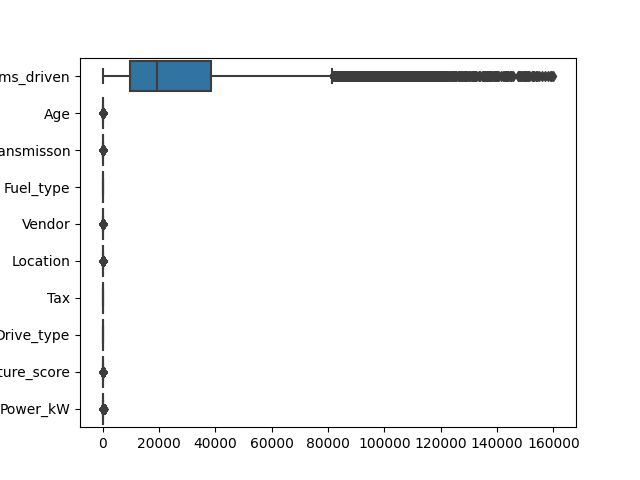

In [15]:
#identifying the outliers 
fig, axs = plt.subplots()
sns.boxplot(data= data1.drop(["Car_name","Price_Euro"],axis=1, inplace= False),orient = "h")
plt.show()

<IPython.core.display.Javascript object>


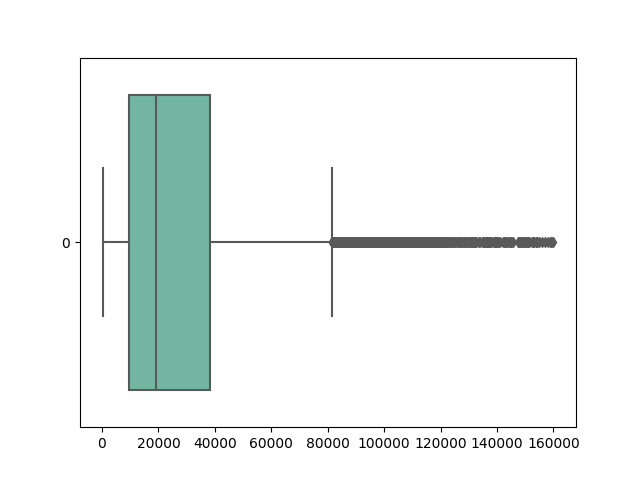

In [16]:
fig,axs = plt.subplots()
sns.boxplot(data = data1["Kms_driven"],orient = "h", palette = "Set2")
plt.show()

In [17]:
#Treating the Outliers
q75,q25 = np.percentile(data1["Kms_driven"],[75,25])
iqr = q75- q25
print("IQR",iqr)
whisker = q75+(1.5*iqr)
data1["Kms_driven"] = data1["Kms_driven"].clip(upper = whisker) 

IQR 28748.0


<IPython.core.display.Javascript object>


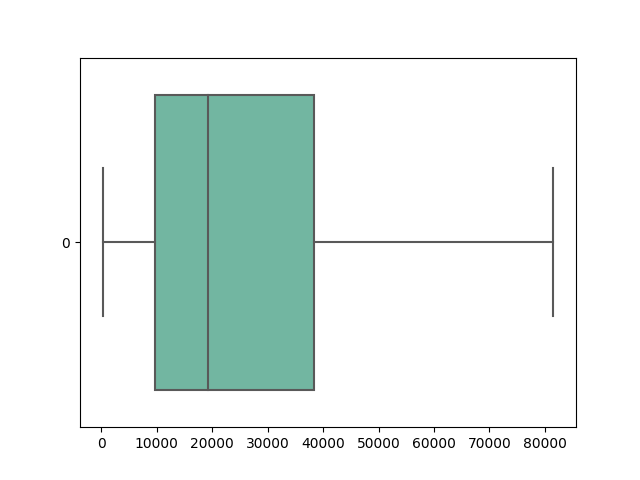

In [18]:
fig,axs = plt.subplots()
sns.boxplot(data = data1["Kms_driven"],orient = "h", palette = "Set2")
plt.show()

<IPython.core.display.Javascript object>


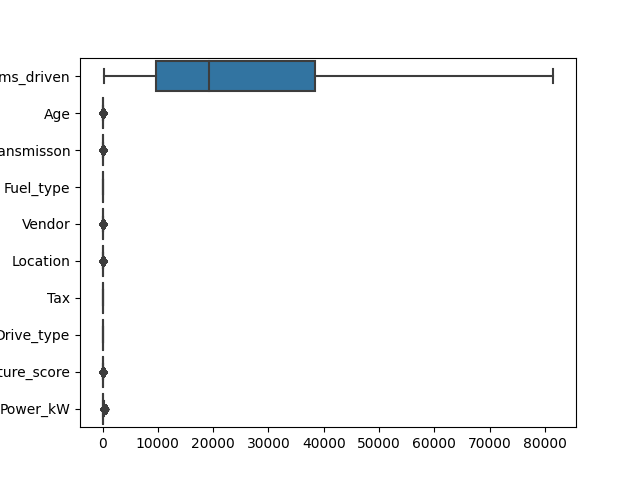

In [19]:
fig, axs = plt.subplots()
sns.boxplot(data= data1.drop(["Car_name","Price_Euro"],axis=1, inplace= False),orient = "h")
plt.show()

In [20]:
data1.isnull().sum()

Car_name         0
Kms_driven       0
Age              0
Transmisson      0
Fuel_type        0
Vendor           0
Location         0
Price_Euro       1
Tax              0
Drive_type       0
Feature_score    0
Power_kW         0
dtype: int64

In [21]:
data1.shape

(9978, 12)

In [22]:
# Droping the na values as we have only one record with na 
data2 = data1.dropna()
data2.shape

(9977, 12)

In [23]:
#Simple linear regression 
#Correlation matrix

In [24]:
data2.corr()

,Kms_driven,Age,Transmisson,Fuel_type,Vendor,Location,Price_Euro,Tax,Drive_type,Feature_score,Power_kW
Kms_driven,1.000000,0.735044,0.120933,-0.063766,0.205052,0.030029,-0.283265,-0.166491,0.103757,-0.014997,0.065942
Age,0.735044,1.000000,0.149740,0.111912,0.293091,-0.015225,-0.350673,-0.238269,0.071872,0.016442,0.061974
Transmisson,0.120933,0.149740,1.000000,0.202634,-0.013007,0.044856,-0.537078,-0.222282,-0.303575,-0.016681,-0.432134
Fuel_type,-0.063766,0.111912,0.202634,1.000000,0.101703,0.136960,-0.121507,-0.025097,-0.030155,-0.021100,0.068043
Vendor,0.205052,0.293091,-0.013007,0.101703,1.000000,-0.063925,-0.003813,-0.097014,0.089816,0.029008,0.164588
Location,0.030029,-0.015225,0.044856,0.136960,-0.063925,1.000000,-0.074521,-0.030005,0.017333,-0.098889,-0.029060
Price_Euro,-0.283265,-0.350673,-0.537078,-0.121507,-0.003813,-0.074521,1.000000,0.344126,0.458708,-0.045343,0.754411
Tax,-0.166491,-0.238269,-0.222282,-0.025097,-0.097014,-0.030005,0.344126,1.000000,0.150566,0.051725,0.198776
Drive_type,0.103757,0.071872,-0.303575,-0.030155,0.089816,0.017333,0.458708,0.150566,1.000000,-0.027708,0.519034
Feature_score,-0.014997,0.016442,-0.016681,-0.021100,0.029008,-0.098889,-0.045343,0.051725,-0.027708,1.000000,-0.034047
